In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

data_raw = pd.read_csv('data.csv')
durations = []
dT = 0.01  # it will be  changed

with open('/home/marcel/Documents/Article_RTOS_2020/ros_ws/src/dynamic-model-car-simulator/params.txt') as file:
    l = file.readline()
    file.readline()
    dT = float((l.split(' '))[1])


data = pd.DataFrame(data=data_raw)
interest_a = 190
interest_b = 210
d = data[interest_a:interest_b] #19 30

n = 1   # granularity
data[:]


,x,y,t,torque,steering_angle,long_vel,lat_vel,yaw_angle,yaw_rate,slip_angle_f,slip_angle_r,norm_load_f,norm_load_r,slip_angle_est_f,slip_angle_est_r,lat_for_f,lat_for_r
0,0.000000,0.000000,0.01,0,-0.87,0.000000,0.000000,4.960370e+180,0.000000,0.000000,0.000000,6338.75,6338.75,0.000000,0.000000,0.000,0.000
1,0.000000,0.000000,0.02,0,-0.87,0.000000,0.000000,4.960370e+180,0.000000,0.000000,0.000000,6338.75,6338.75,0.000000,0.000000,0.000,0.000
2,0.000000,0.000000,0.03,0,-0.87,0.000000,0.000000,4.960370e+180,0.000000,0.000000,0.000000,6338.75,6338.75,0.000000,0.000000,0.000,0.000
3,0.000040,-0.000255,0.04,500,0.00,0.025800,0.000000,4.960370e+180,0.000000,0.000000,0.000000,6088.75,6588.75,0.000000,0.000000,0.000,0.000
4,0.000119,-0.000765,0.05,500,0.00,0.051600,0.000000,4.960370e+180,0.000000,0.000000,0.000000,6088.75,6588.75,0.000000,0.000000,0.000,0.000
5,0.000239,-0.001529,0.06,500,0.00,0.077399,0.000000,4.960370e+180,0.000000,0.000000,0.000000,6088.75,6588.75,0.000000,0.000000,0.000,0.000
6,0.000398,-0.002549,0.07,500,0.00,0.103199,0.000000,4.960370e+180,0.000000,0.000000,0.000000,6088.75,6588.75,0.000000,0.000000,0.000,0.000
7,0.000597,-0.003824,0.08,500,0.00,0.128999,0.000000,4.960370e+180,0.000000,0.000000,0.000000,6088.75,6588.75,0.000000,0.000000,0.000,0.000
8,0.000804,-0.005149,0.09,100,0.00,0.134159,0.000000,4.960370e+180,0.000000,0.000000,0.000000,6288.75,6388.75,0.000000,0.000000,0.000,0.000
9,0.001019,-0.006526,0.10,100,0.00,0.139319,0.000000,4.960370e+180,0.000000,0.000000,0.000000,6288.75,6388.75,0.000000,0.000000,0.000,0.000


In [39]:
#change_1 = int(angle_ch_t_1/dT)
#change_2 = int(angle_ch_t_2/dT)
#change_1

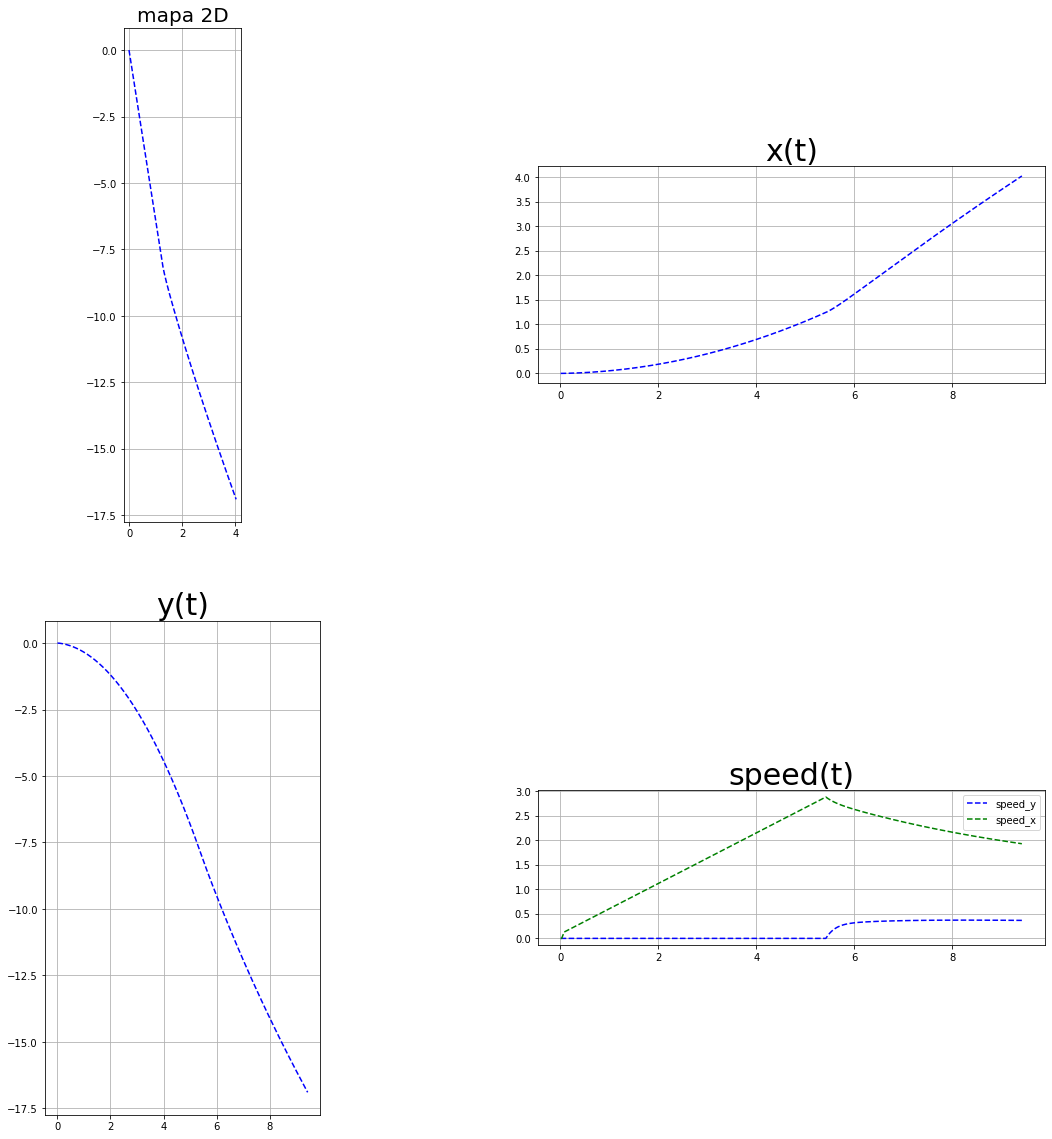

In [40]:
plt.figure(figsize=(20,20))

x = data['x']
y = data['y']
t = data['t']
speed_x = data['long_vel']
speed_y = data['lat_vel']

# mapa 2d
ax = plt.subplot(221)
plt.plot(x, y, '--b')
plt.grid(True)
plt.title('mapa 2D', fontsize=20)
ax.set_aspect('equal')


# x(t)
ax = plt.subplot(222)
plt.plot(t, x, '--b')
plt.grid(True)
plt.title('x(t)', fontsize=30)
ax.set_aspect('equal')


# y(t)
ax = plt.subplot(223)
plt.plot(t, y, '--b')
plt.grid(True)
plt.title('y(t)', fontsize=30)
ax.set_aspect('equal')

# speed
ax = plt.subplot(224)
ax.plot(t, speed_y, '--b', label='speed_y')
ax.plot(t, speed_x, '--g', label='speed_x',)
ax.grid(True)
ax.legend()
plt.title('speed(t)', fontsize=30)
ax.set_aspect('equal')


[]

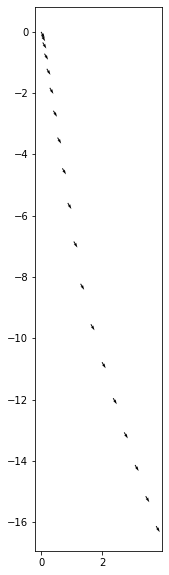

In [56]:
data_yaws = data['yaw_angle']
data_x = data['x']
data_y = data['y']
n = 50

x = data_x[::n]
y = data_y[::n]
u = np.cos(data_yaws)[::n]
v = np.sin(data_yaws)[::n]
#u = data['long_vel'][::100]
#v = data['lat_vel'][::100]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.quiver(x,y, u,v)
plt.plot()

Text(0.5, 1.0, 'torque(t)')

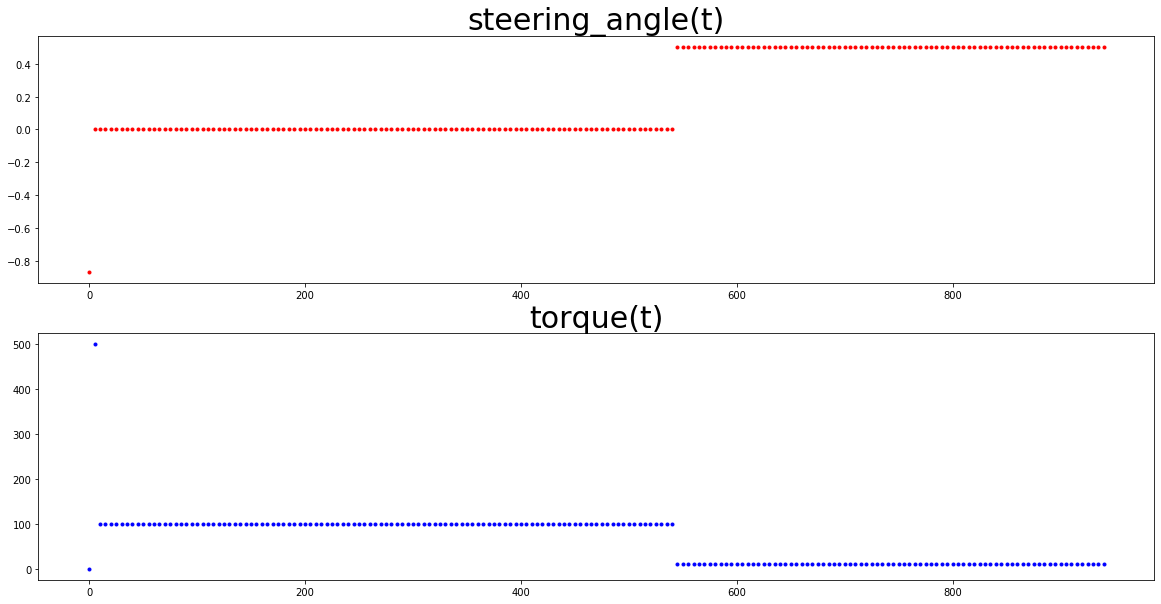

In [42]:
fig = plt.figure(figsize=(20,10))

plt.subplot(211)
plt.plot(data['steering_angle'][:][::5], '.r')
plt.title('steering_angle(t)', fontsize=30)

plt.subplot(212)
plt.plot(data['torque'][:][::5], '.b')
plt.title('torque(t)', fontsize=30)

Text(0.5, 1.0, 'kąt(t)')

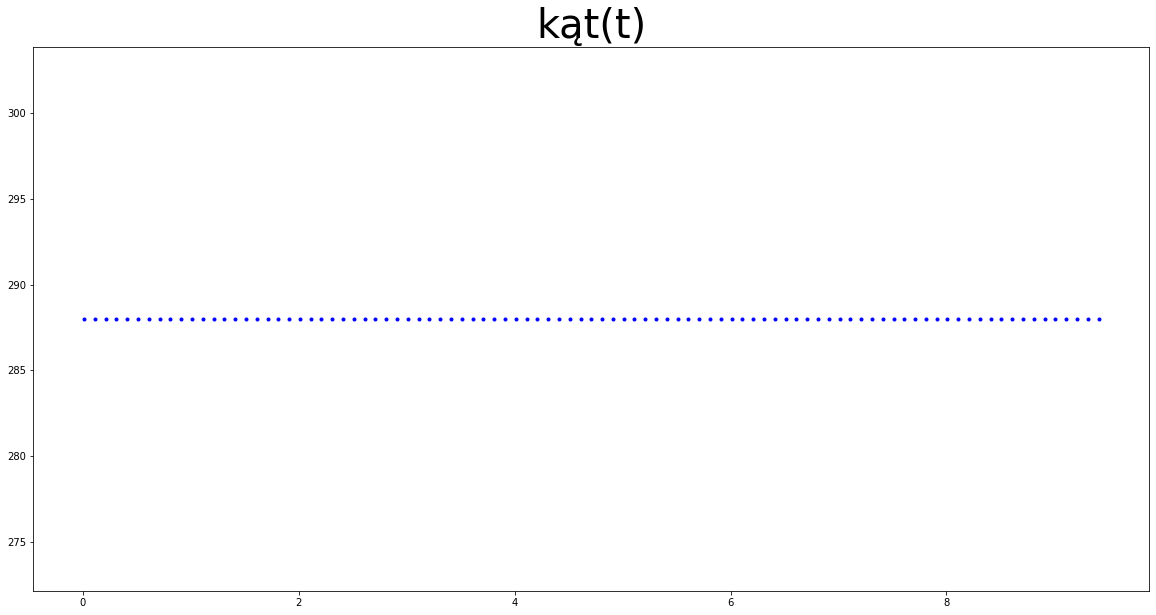

In [43]:
interest_a = 0
interest_b = 800
n = 10
yaw = np.rad2deg(np.unwrap(data['yaw_angle'][:][::n])) %360

max_yaw = np.max(yaw)

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['t'][:][::n], yaw, '.b')
plt.title('kąt(t)', fontsize=40)

Text(0.5, 1.0, 'speed x and y')

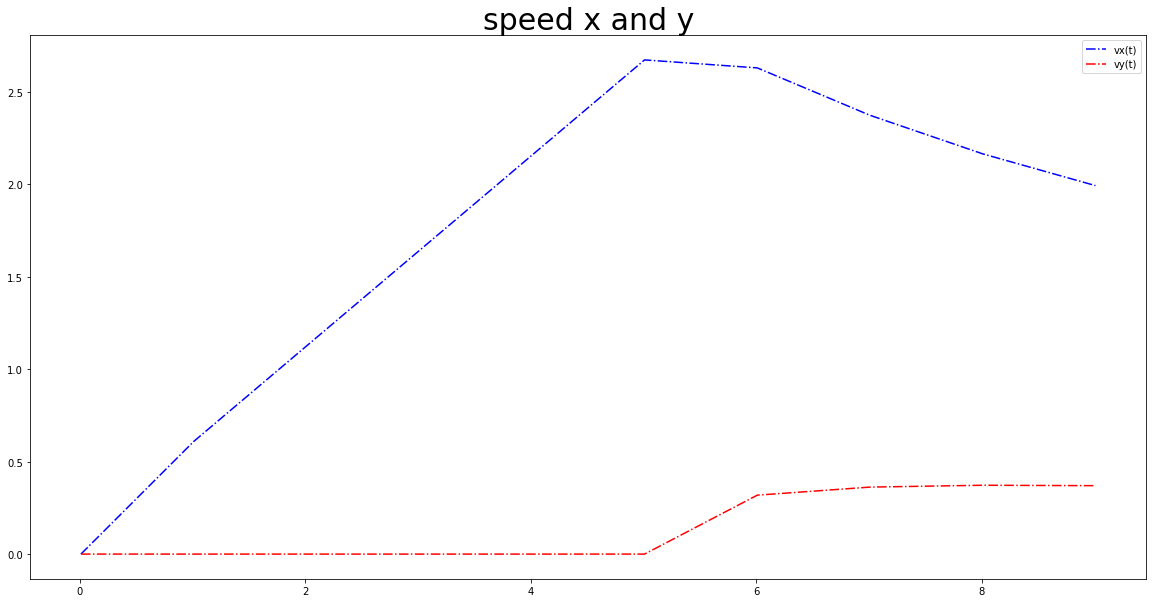

In [44]:
fig, ax = plt.subplots(figsize=(20,10))
max_speed = np.max([data['long_vel'], data['lat_vel']])
n = 100
ax.plot(data['t'][::n], data['long_vel'][::n], '-.b', label='vx(t)')
ax.plot(data['t'][::n], data['lat_vel'][::n], '-.r', label='vy(t)')
leg = ax.legend();
plt.title('speed x and y', fontsize=30)

In [45]:
max_speed

2.88442

Text(0.5, 1.0, 'slip_angle_front(t)')

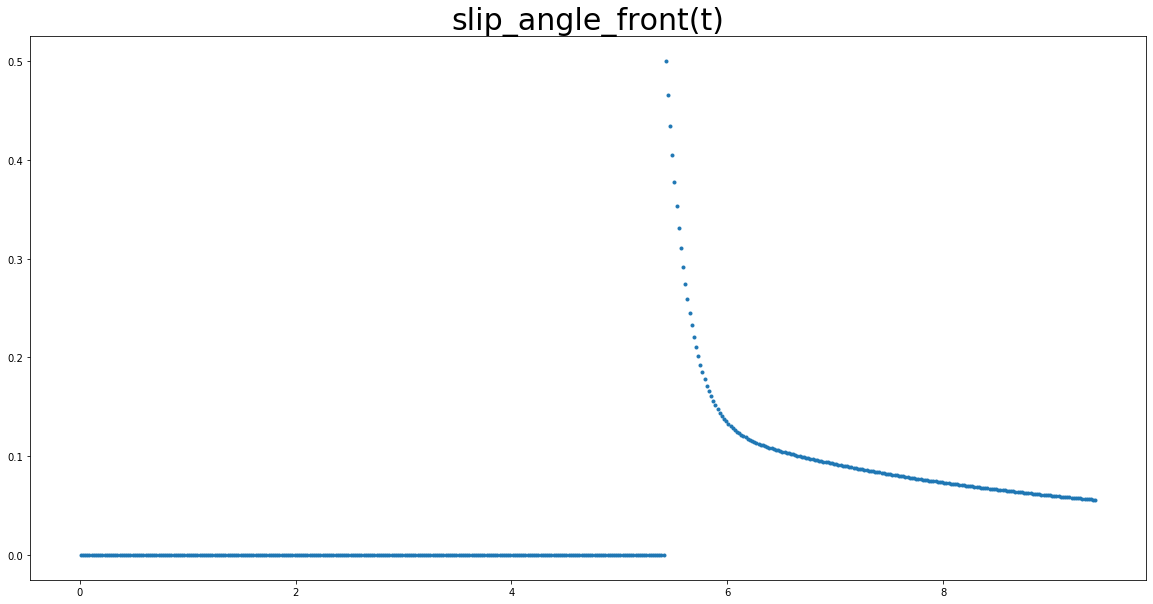

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
slip_angle = data['slip_angle_f']
interest_a = 0
interest_b = 0
n = 2

max_slip = np.max([data['slip_angle_f'], data['slip_angle_r']])
ax.plot(data['t'][:][::n], slip_angle[:][::n], '.')
plt.title('slip_angle_front(t)', fontsize=30)
#ax.plot([angle_ch_t_1]*10, np.arange(-max_slip,max_slip,max_slip/5), '-r', \
#         [angle_ch_t_2]*10, np.arange(-max_slip,max_slip,max_slip/5), '-r', alpha=0.2)

Text(0.5, 1.0, 'vx^2 + vy^2')

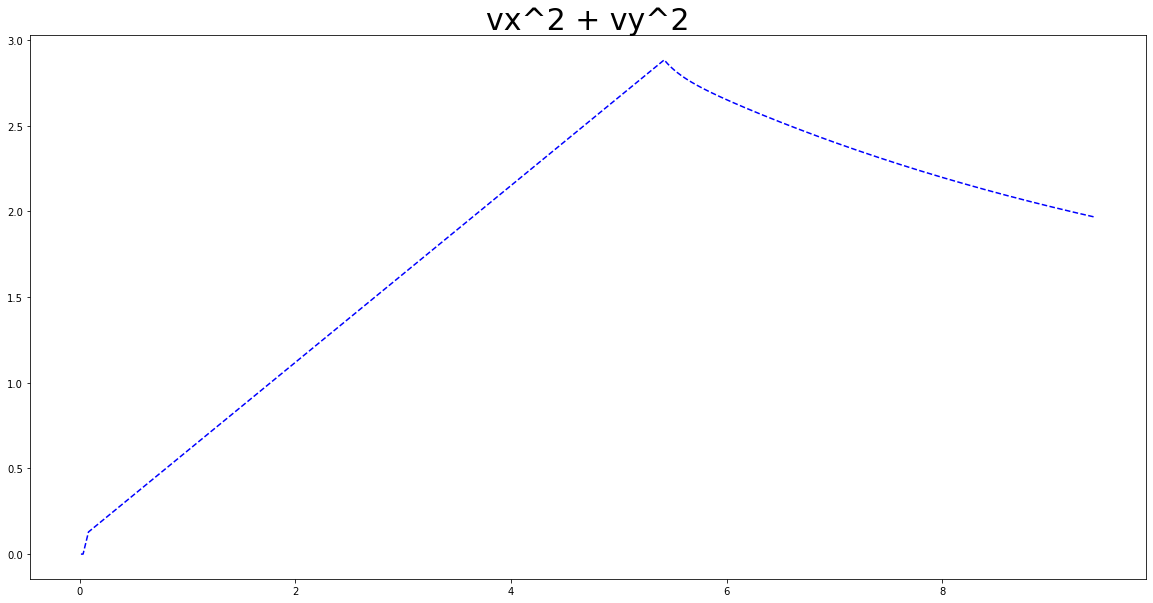

In [47]:
fig, ax = plt.subplots(figsize=(20,10))
energy_data = np.sqrt(data['long_vel'][:]**2 + data['lat_vel'][:]**2)
max_en = np.max(energy_data)

ax.plot(data['t'][:], energy_data, '--b')
#ax.plot([angle_ch_t_1]*10, np.arange(0,max_en,max_en/10), '-r', \
#         [angle_ch_t_2]*10, np.arange(0,max_en,maxdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABJMAAAJbCAYAAABQGNVnAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzs3XucW3d55/Hvo5HHjYtJhomTNDgeZyBxwU63eIZ4uBTCJcC+GjAxoQlOuezWTShlF5ayu7QEEwyUtlu66ZbscjEshdokkAQnpGxJQ5JCWsZ4ZNraTkkwk8ieGHKZKBdw8IxGz/5xjmZkWRppRkeXc/R5v15+RZcj6WeNYx999TzPz9xdAAAAAAAAQD1S7V4AAAAAAAAA4oMwCQAAAAAAAHUjTAIAAAAAAEDdCJMAAAAAAABQN8IkAAAAAAAA1I0wCQAAAAAAAHUjTAIAoAOY2dVm5uGvC6ocU7z/rtauDuXM7K7iz6Pda6mHmT3fzD5vZgfN7GjJn6Vd7V5bJzGzvwzfl381M2vwuc42s+nw+V4b1RoBAOgE6XYvAAAAAM1jZi+X9HeSfqnda2k2M1st6R3h1bvc/a4FPHatpHeFV6929xOCQjN7h6TVkuTuV8/3fO5+v5l9SdJ/lPSXZnaeu0/Xux4AADoZYRIAAECy/ZXmgqQvSbpLUi68/pN2LKiJVkv6cMn1uxbw2E8oODf+F0lfr3LMOyS9PLx8dR3P+TFJb5O0RkGo9JkFrAcAgI5FmAQAQEy4e0NtN+g+ZrZS0nnh1W+5+9vbuZ5OZWbDkl4fXv1EpaqkxQirk66T9NuSrjKzL1CdBABIAmYmAQAAJNdZJZd/0LZVdL4/CP/7hKSbI37uL4X/XSnpzRE/NwAAbUGYBAAAkFxLSy4fa9sqOpiZrZB0SXj1Rnf/RcQvcYfm2gnfNd+BAADEBWESAAARMrMeM3urmX3DzA6b2S/M7Onw8l4z+6yZbTKzZYt47nl3czOzL5Ycszq87XIzu93MfhKu5QEz225mz2/oN1p7rSvMbIuZ/Y2Z7TezJ8OdrR41s1Ez+6iZnVHH8xz3ezazZWb2fjMbM7Ocmf3czA6Y2SfMrK/Otb0gfK+y4XvyEzP7lpldGt6/uuR1v9jI+xA+36lm9kEz+66Z/dTMpszskfD6fzOz5Y2+RoXXvCvcae7Okps/XPL7Om4nukq/ZzN7tpl9PNzZLBfed3WF1zIz+y0zu8HMDoXv6ePh4/7CzM6psdYLSl776vC2VWb2STP7YfgzftzM/snM3mVmJ4xpKD5Hrd+vVd597zLNjX7YUeP9fHnJbSc8d6X3x91nJF0fXn2JmQ3O934AABAHzEwCACAiZnaqpG9KemGFu1eGv14g6XclXSypmduy95rZ1yW9sez2AUm/I+mtZvYud/981C8cfli+T1JPhbv7w18bJP0XM3ubu9+0gOf9hqTyIOz54a+3mNkF7v7APM/xB5L+tGxtZ4S/XmNml0j6o3rWU+ea3yHpf0kqD4xOlfTS8Nf7zOxid/9eVK/bKAu2sv+KpHkDOjM7XcGw6heV3bVUwaym8yS928y2uvuf1Pnarwtf+5Syu14U/nqjmb3e3aOqtCr+PzIt6R8jes5yd0p6b3j5DZKuadLrAADQEoRJAABE53OaC5IOKvhAfJ+kpyU9U8GOTi9TEKQ0258q+JCclfQFSfdKelZ422sk9Ur6nJk94u63RPzavQrCmnFJ35a0X9IjCiqiV0l6taRXSvplSdeZ2Uvd/fs1nvOZkv5W0q9KukXS/5P0mKRBSb8XPu+Agvk0L6v0BGb2dkl/XnLTNyTdqmBOzjkKdtu6RFIkw5fN7D2aCw2OSbpR0nclTSr4WbxO0kZJp0u63cxe6O73RPHakq5SEFitk/TR8LbrJV1Xx2OfK+mrkp4RPubbkp6UdLakB4sHhRVV35F0bnjTTxT8WTsgaZmkCxXMCFoi6RNmlnL3P67x2r8u6b9KMgU7n31PwXs3LOmdCv7MXCjpg5K2ljxuv4KAdkG/XzM7SUGgJ0n/Mk9AVXw/PyZpbXjbxRWO+2GVx4+WXH6tCJMAADFnEW1WAQBAVzOz0xR8mE5JGpN0gbv/vMqxA5Lk7tmS267W3Jbmr3D3uyo8rviP9j+4+wUV7v+ipNLduu6U9AZ3/1nZce9WsF28JP1U0jnlxzTCzJ4l6XnuXrXKw8xeoSDM+WVJd7n7K6ocV3qiMiXpTe5+a9kx/ZL2KAg7JGlDeTgVHnNQQbVLQdJb3X1n2TEnSbpJQchT9Nfu/o4K67pLYctTpV32zGxIQYCQVhDkvd7df1ThuN9UUNmzRNL33T3SoNHMLtBc69dH3P3qKsetlnR/yU0/k/Sb7v6deZ77/ygIeCTpbkkXufsTZce8RsFA61+SlJc07O7/Ms8aJemQpFeXv19mdr6CyqG0pJykXykPf+r9/ZYc/yJJ/xRevdbd313j+Ls0z8+9xmPvl7Ra0mPu3r+QxwIA0GmYmQQAQDQGNffv6s5qQZIUhEilQVKTPCHpskohkbt/SnMzXM6QdHmUL+zuj80XJIXH3Cnpk+HVC8zsrPmOD32sPEgKn2tSUmnFy2srPPY/aK5t6rPlQVL4PE8reC9ydayllg8rCD2OKQhZTgiSwtf8W0nF9q/zzezFEbx2FD5YI0haoeA9lYKqpTeXB0mS5O63SfpQeDWtoOqolt+u9H6FAWHxz22fpPPreK5a1pVcvjeC55vPv4X/fZaZrWzyawEA0FSESQAARONoyeW1VY9qnb9x94fnuf+TJZcrteu0wj+VXK4VDMxI+tQ8999RcrnScPGNJZf/stqTuPtjkr5cYy3zsmAQ+G+GV29294M1HvI3JZdf08hrR+SopFqztH5TczvF/bW7/3SeY/+3pKfCyxvNrNIsraIfuPt357m/1s95oQZKLj8WwfPNpzSkHKh6FAAAMcDMJAAAonFA0hFJZ0r6HTMzBTOUvu/uhTas59s17h9TUFHyTFUeGN4wM1uroO3uJQpmEp2sYJ5SJbUqNe5z9/kqhh4suXzc0GgzS0laH179qbtXm2tTdJek/1zjmPm8RHNf2P3CzMqHoJdbUnL5eQ28blR+MF9lXag0/LttvgPd/aiZ3S3p3yuYw/R8SfuqHD5a5faiqj/nRXpWyeVmh0mTJZejWDsAAG1DmAQAQATcfcbMrlQwZLlXwTDn/yjpcTP7noKZMt9y90yLljRvNYy7u5mNKxh4/CwzWxrV7lhhkPYnkt6v+qugn1nj/kfnu9PdjwUvKymYz1PqZAUDoaVgKHgt9Rwzn9Ull98W/qpXJ4QMD9Y+RL9Scvm+Oo6/T0GYVHxstTBp3p+zgrbBovKf82IsLbn8VNWjovFkyeWTmvxaAAA0FWESAAARcfdbwyHBVytoA1qiYE7Pvw9/fdzM9kv6r+7+d01eztHah6i0+uQZOv6DeiP+SNJ/Cy/PSLpdQUvbofA1p8P7Snfemq/1SQqGZi/WL5dcXuj7shgnN/DYapVbrfR0HccsL7lcz/tVOrtredWjGvs5L0bpn/lagWajSv9c1PMeAwDQsQiTAACIULhT1cXhtukvkfRiBVvVv1hBuLRO0jfN7K3uvqOJS1lW+5DjQpZIdnMLd0T7w/DqUwp2pqtYjWVm05Vub4LSsGOh78tilL6X73D3v27w+TpRaRVPPe/XM6o8tt1KW9ueVfWoaLSypQ4AgKZiADcAAE3g7k+5+9+5+1Z3v0BBa8//DO82SX9RYxBxo547351hK9pgePWxqFrcJL1Ic+HCZ2q09bVqCPETmqtIGpzvwAUcM5/SNrFOGMbeDD8puXxOHceXHnMk4rU04oGSy60Mk5q9myMAAE1FmAQAQAu4+6S7v0/B4GtJOk31fQhfrFfWuH9Ic209eyJ83dNLLv+4xrGvjfB1qwoHoO8Nr55hZr9a4yEXNPiS35Hk4eWN4QDwpPl+yeUL5zswrFZ7aXj1Z5L+rVmL0vFtclb1qDn7Sy6vWcjzW8mQrjoVh6tPuns9c6kAAOhYSTy5AQCgkz1QcrmZ7ea/bWYr5rn/fSWXb4rwdUtnEj2n2kFmtl7SRRG+bi03l1x+T7WDzOxZkn67kRdy94clFWdinSvpdxp5vg71t5qbN/R2MzttnmN/T3PB5S53n2niukpbDOtpv/tnzf0+NjTh+SVJZna65irxvj/fsQAAxAFhEgAAETCz15rZe8ys6vBlM3uu5qo4fqbalTuNOEXSV8zshA+8ZvZOSW8Jr/5U0s4IX3es5PIWMzu7wuufo2DXu1aeh3xR0uPh5SvMbHOFdZ0kaYeiaXe6SnODxv/KzOYNqMxslZn9jxqhTMdw90ckfSG8eoqkr5rZCQOszexVkj4WXs1L+vMmL+3+ksvrax3s7r9QsNOiJP2amS2d7/iFPn+J0qDqWwt4HAAAHYkB3AAARONXJF0j6c/M7E5JuxVsMX9U0qmSXijptzRXzXCNuzdzR6ddkt4oab+ZfV7SjxR86L9Yc+1lLulKd49k+LYkufuDZnaTpE3h6/2LmX1G0r8qCI9eLOltCrZ1/1J4uenc/VEz+y+S/m+4jh1mdqmCCpsnFLQc/gcF85K+JunN4UMXtbuYu+81s9+T9DkF289/2cz+QEGF1EEF1TCnSPpVBYPaz1fQlvWXi/oNtsd/l/QqBdVXL5d0j5l9QdI9Cgadv1rSpZoLDT8cDqhvGnfPmdkPJL1A0ivM7NOSvq2Sod8VdlLcFf4+lij4Wdwxz0t8W9J/Di9/3sz+p4L5R8Vqq4PufrDC415RfHlJt9T/OwIAoDMRJgEAEI1i6NCrIKypNg/IJf0vSR9u8nr+e/haF0v6aIX7pyT9vrs344PtFQrCmfMUbAP//rL7C5I+pKAipCVhkiS5+xfN7FRJfyKpR9Ibwl+lblDwsymGSYveeczdP29mDysIlE6X9Ovhr2omJf1isa/Xau7+lJm9TEEYMyLp2Qp+ruXykra6+ydatLQPSvqGgp/xleGvUuWzjq6T9BcKwqTLNX+Y9LcK/ty+VMGQ+2vL7v+IpKuPe7FgZtal4dV/dPf7BQBAzNHmBgBANL4s6d8pmEVUrD75uYKKhScUzGb5lKQhd39vOBS6mabcfZOC+T/flvSQggDpkIL2pBe4+/ZmvLC7TyoIF/5Q0g8UVGcdVdDW938lvdjdP1b9GZrH3f9cQRXQlyVNKHhPHpL095Iuc/c3a26+j9TgFu7u/g1JZ0t6p4KKlMOSng5f9xFJ35P0V5JeL+lMd3+0kddrNXd/SEG12aWSvq7gPT0m6UlJBxRU6z2/hUGS3P3/Kagw2qmgLW3eCsDwPf9aePUSM/uleY6dUdCq+gEFP7uc5qqSqnmVgspFSfo/tdYPAEAcmLvXPgoAAHQ8M/uipLeHV8929wfat5r4MrP/pKB6TJI2ufvX27keNF84ED4TXt3s7l+J8Lm/JOmtCoLE57j7dI2HAADQ8ahMAgAACJnZEs21RU1L+sc2Lgct4u57NTfL6ANmVt4KtyhmtlrSZeHVjxMkAQCSgjAJAAB0BTN7hpkNzXP/UgUtgGvDm77u7g+3ZHHoBH+kYL7TrykYIB+FqxTMYrpXc7vfAQAQewzgBgAA3eIUSWNm9q8KZiTdo2Ce1TMUBAiXKhgiLQWzcP6gHYtEe7j7ATO7VtJ7JG01s5u8gXkQYVVSccD8e6hKAgAkCTOTAABIiEZnJpnZryrYqn6xbnP3ow08vqnMbKWCuTW1HJL0hmZvYz8fM3uNpGWLfPij7n53lOsBAAAoFcsw6dRTT/XVq1e3exkAAHSUBx54QJOTk5KkdevWaenSpQt6/JEjR/STn/xk0a+/mNdsJXfXk08+qSeffFI/+9nPND09rXw+L0lKp9M66aSTdMopp6i/v1+pVHsnAezbt09TU1OLeuwznvEMrVmzJuIVAQCAbpDJZB519xW1jotlm9vq1as1NjbW7mUAAJAoV199tT7ykY8s+vHf+MY3xJc90Vi9erWy2eyiHjs0NKS77ror2gUBAICuYGZ1nYDEsjJpeHjYCZMAAAAAAACiY2YZdx+udRy7uQEAAAAAAKBuhEkAAAAAAACoG2ESAAAAAAAA6kaYBAAAAAAAgLoRJgEAAAAAAKBuhEkAAAAAAACoG2ESAAAAAAAA6kaYBAAAAAAAgLoRJgEAAAAAAKBuhEkAAAAAAACoG2ESAAAAAAAA6kaYBAAAAAAAgLoRJgEAAAAAAKBuhEkAAAAAAACoG2ESAAAAAAAA6kaYBAAAAAAAgLoRJgEAAAAAAKBuhEkAAAAAAACoG2ESAAAAAAAA6kaYBAAAAAAAgLql270AAAAAAEDzZLI53bh3Qo8+dUwrli/V2jNP1v4jT8xe37R+pYYG+tq9TAAxQpgEAAAAAAlUDJG+OnZY+Rmvetz1Y4d16fBZhEoA6kaYBAAAAAAJs3P3IW29eb9mCq7qMVIgP+PasfuQrt9zWNs2rtPmDataskYA8UWYBAAAAAAJUaxGun7PYc0UasVIx8sXXFft2idJBEoA5kWYBAAAAAAJUK0aqcekVz3vdEk6YWaSJH37hw/PBk8Flz60a58OHHmCtjcAVREmAQAAAEDM7dx9SFft2qfyYqR0ymq2rpU/dsZF2xuAeREmAQAAAECMZbI5bb15/3FBUo9Jl52/qq7qomJYVF7VlC+4tt68X2vOWE6FEoDjECYBAAAAQExlsjldc/t9x81HSpn00Teet6CKos0bVmnNGctPmLdUcNfo+CRhEoDjECYBAAAAQAyVz0gyST11tLVVMzTQp6GBPq078+Sw0snVm05pZLA/8rUDiDfCJAAAAACImWJrWz6sIDJJLz3nVL331ec2XEVUrFIaHZ/UyGA/VUkATkCYBAAAAAAxc9PeidkgSQoqkqIIkoqKVUoAUEmq3QsAAAAAANQvk83pa2OHZ68XW9sIfwC0CmESAAAAAMREceB2aXvbpS88a1EzkgBgsWhzAwAAAIAYyGRzunz7qI5NF+QKdm3rTaf0pvUr2700AF2GMAkAAAAAYuCmvRNzQZKklzw3moHbALBQtLkBAAAAQIcrzkkqjtxOp1MESQDahjAJAAAAADrc6PjkcXOSLhlaSZAEoG1ocwMAAACADte3rFcpM0nOnCQAbUdlEgAAAAB0sEw2p223HtBMwZUy09aL1rakKimTzenaOw8qk801/bUAxAuVSQAAAADQoTLZnK65/T5N5YPB2+6u3NGplrzu5dtHNZUvqDed0o4tI7TVAZhFmAQAAAAAHagY6Mzu4GbSknRKI4P9TX/t0fFJTeULKrg0nS9odHySMAnALMIkAAAAAOhAxUDHFcwneclzT23ZDm4jg/3qTac0nS+0LMACEB+ESQAAAADQgcqHbrcqSJKkoYE+7dgyotHxSY0M9lOVBOA4hEkAAAAA0GFKh273pFo3dLvU0EAfIRKAitjNDQAAAAA6TGmLW6uGbgNAvahMAgAAAIAOU9rixswiAJ0mksokM3udmd1rZgfN7AMV7n+Zme01s7yZXVJ234yZ/XP465Yo1gMAAAAAcVXa4pay9rS4AcB8Gq5MMrMeSddKulDShKQ9ZnaLu99TctghSe+Q9P4KT/G0u/96o+sAAAAAgCSgxQ1Ap4uize18SQfdfVySzOw6SRslzYZJ7v5AeF8hgtcDAAAAgETKZHN68PGnle5JaWamQIsbgI4URZj0bEmHS65PSNqwgMf/kpmNScpL+hN331XpIDO7QtIVkrRq1apFLhUAAAAAOlMmm9Pl20c1lS8onTJddv4qbVq/khY3AB0niplJVuE2X8DjV7n7sKTNkq4xs+dUOsjdP+vuw+4+vGLFisWsEwAAAAA6VrG9reDSTMF15iknESQB6EhRhEkTks4qub5S0pF6H+zuR8L/jku6S9ILIlgTAAAAAMTKyGC/etMp9ZhobwPQ0aJoc9sj6RwzO1vSg5IuU1BlVJOZ9Uk66u7HzOxUSS+R9GcRrAkAAAAAYmfT+pWy8L9UJQHoVA2HSe6eN7N3S/qWpB5JX3D3A2a2TdKYu99iZi+U9HVJfZJeb2Yfcfe1kp4n6TPhYO6UgplJ91R5KQAAAABIpNJ5Sb3plDatX9nuJQFAVVFUJsndvynpm2W3bS25vEdB+1v54/5J0nlRrAEAAAAA4qp0XtJ0vqDR8UkqkwB0rEjCJAAAAADA4vUt61XKTJIzLwlAx4tiADcAAAAAYJEy2Zy23XpAMwVXykxbL1pLVRKAjkaYBAAAAABtVGxxc0nurtzRqXYvCQDmRZgEAAAAAG00Mtiv3nRKPSZa3ADEAjOTAAAAAKBNMtmcRscntfWitcodndLIYH/HtbgV19iJawPQHoRJAAAAANAGmWxOl28f1VS+oN50Sju2jHRcWBOHNQJoPdrcAAAAAKANirOSCi5N5wsaHZ9s95JOEIc1Amg9wiQAAAAAaIM4zEqKwxoBtB5tbgAAAADQJpvWr5SF/+3E9rGhgT7t2DLCzCQAxyFMAgAAAIAWK59FtGn9ynYvqaqhgT5CJADHoc0NAAAAAFqMWUQA4owwCQAAAABajFlEAOKMNjcAAAAAaKFMNqfR8UltvWitckenmEUEIHYIkwAAAACgRcpnJe3YMkKQBCB2aHMDAAAAgBZhVhKAJCBMAgAAAIAWYVYSgCSgzQ0AAAAAWmRooE87toxodHySWUkAYovKJAAAAABokeLwbYIkAHFGZRIAAAAAtADDtwEkBZVJAAAAANACDN8GkBSESQAAAADQAgzfBpAUtLkBAAAAQAswfBtAUlCZBAAAAAAtwPBtAElBZRIAAAAANFnch28ThAEoRZgEAAAAAE1Wafh2XEKZuAdhAKJHmxsAAAAANFmch2+zCx2AclQmAQAAAECTxXn4djEIm84XYheEAWgOwiQAAAAAaKLSeUO//4rntns5CxbnIAxAcxAmAQAAAECTJGXe0NBAXyzXDaA5mJkEAAAAAE3CvCEASUSYBAAAAABNEufB2wBQDW1uAAAAANAkzBsCkESESQAAAADQRMwbApA0tLkBAAAAQJNksjlde+dBZbK5di8FACJDZRIAAAAANEFSdnIDgHJUJgEAAABAE7CTG4CkIkwCAAAAgCZgJzcASUWbGwAAAAA0ATu5AUgqKpMAAAAAoAky2RxBEoBEojIJAAAAACLG8G0ASUZlEgAAAABELInDtzPZnK6986Ay2Vy7lwKgzahMAgAAAICIFYdvT+cLiRi+TaUVgFKESQAAAAAQsaQN365UaRX33xOAxSNMAgAAAIAmGBroS0zgkrRKKwCNIUwCAAAAAMwraZVWABpDmAQAAAAAEcpkc4kMXZJUaQWgMYRJAAAAABARBlUD6Aapdi8AAAAAAJKi0qBqAEgawiQAAAAAiEhxUHWPiUHVABKLNjcAAAAAiAiDqgF0A8IkAAAAAIgQg6oBJB1tbgAAAAAQkUw2p2vvPKhMNtfupQBA01CZBAAAAAARYCc3AN2CyiQAAAAAiAA7uQHoFoRJAAAAABCBbtnJjVY+ALS5AQAAAEAEumEnN1r5AEiESQAAAAAQmaTv5FaplS/Jv18AldHmBgAAAACoS7e08gGYH5VJAAAAAIC6dEMrH4DaCJMAAAAAIAKZbK4rQpakt/IBqI0wCQAAAAAaxGBqAN2EmUkAAAAA0KBKg6kBIKkIkwAAAACgQQymBtBNaHMDAAAAgAYxmBpANyFMAgAAAIAIMJgaQLegzQ0AAAAAAAB1I0wCAAAAgAZksjlde+dBZbK5di8FAFqCNjcAAAAAWKRMNqfLt49qKl9QbzqlHVtGuqLVLZPNMR8K6GKESQCaJpPN6ca9E3r0qWNasXyp1p55snJHpzjpAAAAiTE6PqmpfEEFl6bzBY2OTyb+PKdbAzQAcwiTAESqNEC6496HlZ/x4+43ST0p05aXnq3lJy0hWAIAALE2Mtiv3nRK0/mClqRTGhnsb/eSmq4bAzQAxyNMAtCwYpnzU09P63PfHVdZfnQcl5QvuD79nXGZpJRJr3re6bry5c/hJAQAAMTO0ECfdmwZ6aqWr24M0AAcz9zn+dTXoYaHh31sbKzdywAgaefuQ9p6837NFFyN/G2S7jFdOnyWNq1f2RUnYQAAAHHGzCQgmcws4+7DNY8jTAKwWDt3H9JVu/apUOWvkXSP6ZVrTpMkrVi+VMuXprX97vvnDZ7SKdO2jeu0ecOq5iwaAAAAAFBRvWESbW4AFqw4F+n6PYdPCJJqta5duPaMeVvi8gXX1pv3a80Zy/mWCwAAAAA6EGESgAUp7t5xbLpwXHVRyqQrfmOw5lDtoYG+2fsuXHvG7LDub//wYc2EydRMwXXj3gnCJAAAAADoQIRJABbkpr0TJwRJi21NKw2Wdu4+pA/t2qcZD4Z0f3XssExihhIAAOhozA4C0I0IkwDUbefuQ7ru+4dmg6Qoh2Zv3rBKB448oZ27g+fPz7h27D6k6/ccZoYSAADoSMWK7al8Qb3plHZsGSFQAtAVUu1eAIB4yGRzwa5tYZJkkn5r+Cx9/OLzIjtp2rR+pZYuSclKbivOUMpkc5G8BgAAQFRGxyc1lS+o4NJ0vqDR8cl2LwkAWoIwCUBNmWxO19x+3+xMI0nqSZnetH5lpK8zNNCnHVtG9JYNq9STmouUijOUAAAAOsnIYL960yn1mLQkndLIYH+7l9RymWxO1955kC/+gC5DmxuAee3cfSioSCq4XEFFUk84I6kZZdzFOUrrzjz5uBlKN2Qm9CbmJwEAgA5S/CKsW2cm0eYHdC/CJABVFVvb8mFFkkl66Tmn6r2vPrfpJwrlM5RmZoLScU5QAABAJyndUKTbVGrz69b3Aug2tLkBqOqmvROzQZIUVCS1IkgqKs5Q6ubScQAAgE5Fmx/QvahMAlBRJpvT18YOz15vZmtbNd1eOg4AANDJOFcDuhdhEoATFAdul7a3XfrCs7R5w6qWr6WbS8cBAAA6HedqQHeKpM3NzF5nZvea2UEz+0CF+19mZnvNLG9ml5Td93Yz+1H46+1RrAfA4hUHKd79o0dVcCll0tIlqch3bgMAAIg7djID0K0arkwysx5J10q6UNKEpD1mdosAJWQhAAAgAElEQVS731Ny2CFJ75D0/rLHPkvShyUNK9iwKRM+lr+NgTa5ae+Ejk0X5ArS5pc8tzUDtwEAAOKEncwAdLMoKpPOl3TQ3cfdfUrSdZI2lh7g7g+4+79KKpQ99rWS/t7dHwsDpL+X9LoI1gRgEYpzkoojt9PpFEESAABABZV2MgOAbhFFmPRsSYdLrk+Et0X6WDO7wszGzGzskUceWdRCAVRXaU7SJUMrCZIAAAAqYCczAN0sigHcVuE2r3BbQ491989K+qwkDQ8P1/v8AOpQLNOebW8zqTfNnCQAAIBq2MlsTiab430AukwUYdKEpLNKrq+UdGQBj72g7LF3RbAmAAtQLNNmThIAAED92MmM2VFAt4qizW2PpHPM7Gwz65V0maRb6nzstyS9xsz6zKxP0mvC2wC0UN+yXqXMgoqkJcxJAgAAQH2YHQV0p4bDJHfPS3q3ghDo3yR91d0PmNk2M3uDJJnZC81sQtKbJX3GzA6Ej31M0kcVBFJ7JG0LbwPQIplsTttuPaCZgitlpq0XrSVIAgAAQF2YHQV0pyja3OTu35T0zbLbtpZc3qOgha3SY78g6QtRrAPAwt20d2J2VpK7K3d0qt1LAgAAQEwwOwroTpGESQDiKZPN6Wtjh2en3vf08G0SAAAAFobZUUD3iWJmEoCYGh2fVL4QREkm6ZKhlZwIAAAA1JDJ5nTtnQeVyebavRQAaAsqk4Aulcnm9ODjTyvdk9LMTEFL0im9aX3FblQAAACE2L0MAAiTgK5UehKUTpkuO3+VNq2nKgkAAKCWSruXcQ4FoNvQ5gZ0odKToJmC68xTTur4kyDKyQEAQCdg97LKOFcDuguVSUAX6lvWq5SZJI/FSRDl5AAAoFOwe9mJOFcDug9hEtBlMtmctt16QDMFV0/KtPWitR3/jz3l5AAAoJOwe9nxOFcDug9tbkCXKf5j75LcXbmjU+1eUk2UkwMAAHQuztWA7kNlEtBl4tbiJlFODgAA0Mk4VwO6D2ES0EXi2OJWRDk5AABA5+JcDegutLkBXSSOLW4AAAAAgM5CmAR0iUw2pwcff1rpHvrZAQAAAACLR5sb0AVKt2tNp0yXnb9Km9avpBQZAABggTLZHLOB5sH7A3QHwiSgC5Ru1zpTcJ15ykn84w4AALBApV/Q9aZT2rFlhHOqErw/QPegzQ3oAmzXCgAA0LjSL+im8wWNjk+2e0kdhfcH6B5UJgFdYtP6lbLwv3xDBAAAsHDFL+im8wW+oKuA9wfoHoRJQMKVlxtvWr+y3UsCAACIpaGBPu3YMsJMoCp4f4DuQZgEJFylcmP+YQcAAFicoYE+zqXmwfsDdAdmJgEJ17esVykzpZiXBAAAgBbIZHO69s6DymRz7V4KgCahMglIsEw2p223HtBMwdWTMm29aC3fFAEAAKBp2NEN6A5UJgEJVmxxc0nurtzRqXYvCQAAAAnGjm5AdyBMAhKsuKNGDy1uAAAAaAHOP4HuYO7e7jUs2PDwsI+NjbV7GUBHy2RzGh2fVN+yXuWOTrGjBgAAAFqieB7K+ScQP2aWcffhWscxMwlIIHrVAQAA0C7s6AYkH21uQALRqw4AABA9dikDgACVSUACFXvVp/MFetUBAAAiQOX3wtDqBiQbYRKQQEMDfdqxZYR/wAEAACJSqfKbc6zKCN6A5KPNDUggvgkCAACIFruU1Y+RC0DyUZkEJAzfBAEAAESPyu/6MXIBSD7CJCBhKMEGAABoDnYpqw/BG5B8tLkBCUMJNgAAANptaKBPv/+K50oSO+ABCURlEpAwfBMEAACATsD4BSC5qEwCEobh2wAAAOgEDOIGkovKJCBBkv7tD0EZAABAfDCIG0guwiQgQZI8fDvpQRkAAEDSMH4BSC7CJCBBkvztT5KDMgAAgKQqnq8VW9w4fwOSgTAJSJAkf/uT5KAMAAAgqaguB5KJMAlImKGBvkT+A53koAwAAHQ25jYuHtXlQDIRJgEJ0Q0nOUkNygAAQOeisqYxVJcDyUSYBCQAJzkAAADNQWVNY6guB5KJMAlIAE5yAAAAmoPKmsYxhBtIHsIkIAE4yQEAAGgOKmsaRxU9kDyESUACcJIDAADQPMxtbAxV9EDyECYBCcFJDgAAADoRVfRA8hAmAQnQDTu5AQAAIJ5Kq+j7lvUyOwlIAMIkIOboQQcAAECnK56fct4KJEOq3QsA0JhKPegAAABAp+G8FUgOwiQg5oo96D0metABAADQsThvBZKDNjcg5tjJDQAAAHFQPG+9ce+ErN2LAdAQwiQgAdjJDQAAAHFx094JTeULunHvBHOTgJiizQ0AAAAA0BLMTQKSgTAJiLlMNqdr7zyoTDbX7qUAAAAA8yrOTUpJMjP1Lett95IALAJhEhBjmWxOl28f1Sdvu1eXbx8lUAIAAIgYX9xFa2igT1svWqtUylRw17ZbD/DeAjHEzCQgxiqVCdNzDgAAEI3iF3dT+YJ60ynm+0Qkd3RKBXfOYYEYozIJiDG2VwUAAGge5vs0B+ewQPxRmQTEWHF71dHxSY0M9nfFNzqZbK6rfr8AAKB9iqHHdL5A6BGh0nPYvmW9syEd53ZAfJi7t3sNCzY8POxjY2PtXgaAFqPUHAAAtBpfZDUP53ZA5zGzjLsP1zqOyiQAscGMKAAA0GpDA32cbzQJ53ZAfDEzCUBs0F8PAACQHMVzu5QkM1Pfst52LwlAnQiTgJjqxm1qi/3173vNGsqgAQAAYm5ooE9bL1qrVMpUcNe2Ww901bktEGe0uQEx1M395ZSaAwAAJEfu6JQK7iq4dGy6oBv3TnCuB8QAlUlADLFNLQAAAJJgZLBf6ZRJklzSDZkJqpOAGCBMAmKI2UEAAABIgqGBPr15+CxZeH1mhi9KgTggTAJiiNlBAAAASIpN61dq6ZLgi9KelOnI409TnQR0OHP3dq9hwYaHh31sbKzdywAAAAAARCCTzenGvRO6ITOh/Ez3zQUFOoWZZdx9uNZxVCYBAAAAANpqaKBPzz7lJOVnCscN4wbQmQiTAAAAAABtxzBuID4IkwAAAAAAbVc+jDufL+ia2+8jUAI6EGESAAAAAJTJZHO69s6DBBktVhzGnZJUkPSPBx/V5dtH+TkAHYYwCYghTm4AAACaJ5PN6fLto/rkbfcSZLRYcdfil5xzqlImFVyazhc0Oj7Z7qUBKEGYBMQMJzcAAADNNTo+qal8gSCjTYYG+vTeV5+r3nRQoWRm6lvW2+5lAShBmATEDCc3AAAAzTUy2K/edEo9Ji1JpzQy2N/uJXWdoYE+bb1orVIpU8Fd2249wJeoQAdJt3sBABameHIznS9wcgMAANAExVar0fFJjQz2a2igr91L6kq5o1MquKvg0rHpgm7cO8HPAugQhElAzHByE8hkc13/HgAAgOYZGujjHKPNRgb7lU6ZpmZcLumrY4dlCoZ087MB2svcvd1rWLDh4WEfGxtr9zIAtElxbtRUvqDedEo7toxwQgEAAJBAH/z6Pu3cfUjFT60maekSzv+AZjGzjLsP1zqOmUkAYoe5UQAAAN1h0/qVWrokJQuvu+Za3gC0D2ESgNhhKCYAAEB3KI54eMuGVUr3BJGSS7ohM8FAbqCNmJkEIHaYGwUAANA9ivOrTJpteZvOM5AbaCfCJACxxFBMAACA7rJp/Up9bewwA7mBDkCbGwAAAACg4w0N9OnNw2fNzk/Kz7h27j6ky7eP0vIGtBhhEhAjmWxO1955kH8sAQAA0JUYyA10BsIkICYy2Zwu3z6qT952L9++AAAAoCtVG8h9/Z7D2rn7UHsXB3QRwiQgJkbHJzWVL6jgwcDB0fHJdi8JAAAAaLmhgT798cXn6dLhs2Zvmym4tt68ny9cgRaJJEwys9eZ2b1mdtDMPlDh/qVmdn14/24zWx3evtrMnjazfw5/fTqK9QBJNDLYr950Sj0mLUmnNDLY3+4lAQAAAG2zaf1KpVM2e32m4Lrm9vsIlIAWMHdv7AnMeiTdJ+lCSROS9kh6i7vfU3LMuyT9mru/08wuk3Sxu18ahkq3uvu6hbzm8PCwj42NNbRuII4y2ZxGxyc1MtjPjhUAAADoejt3H9LWm/drphDs8GaSelKmbRvXafOGVe1eHhA7ZpZx9+Fax6UjeK3zJR109/Hwha+TtFHSPSXHbJR0dXj5BkmfMjMTgAUZGugjRAIAAABCmzes0pozluua2+/T3T96VC4pX3BdtWvf7P0AohdFm9uzJR0uuT4R3lbxGHfPS3pCUrFH52wz+4GZ/YOZ/Ua1FzGzK8xszMzGHnnkkQiWDQAAAAAnYgfdeBka6NN7X32uekpa3goufWjXPn3w6/v4OQJNEEWYVKnCqLx3rtoxP5G0yt1fIOl9knaa2TMrvYi7f9bdh919eMWKFQ0tGEAycKIHAACixg668TQ00KdtG9epJE/SjEs7dh/SpZ/5Hju9ARGLIkyakHRWyfWVko5UO8bM0pJOlvSYux9z90lJcveMpB9LOjeCNQFIOE70AABAM7CDbnxt3rBKH3vjeUqn7Lhqhjw7vQGRiyJM2iPpHDM728x6JV0m6ZayY26R9Pbw8iWS7nB3N7MV4QBvmdmgpHMkjUewJgAJx4keAABoBnbQjbfNG1bp+itfpLdsWHVc29tMwXXj3ok2rgxIloYHcLt73szeLelbknokfcHdD5jZNklj7n6LpM9L+rKZHZT0mILASZJeJmmbmeUlzUh6p7s/1uiaACRf8URvOl/gRA8AAERmaKBPO7aMsINujBU3rVl35sn60K59mvFgxspXxw7LJG1av5KfK9Agcy8fb9T5hoeHfWxsrN3LANBmmWyOEz0AAABU9cGv79PO3YeOG+qbTpm2bVzHTm9ABWaWcffhWsc1XJkEAO1S/NYJAAAAqGTT+pW6ce+Ejk0XZgOlfMH1oV37dODIE1QpAYtEZRIAAAAAILEy2Zxu3Duh6/cc1kzh+M+/PSa96nmn68qXP4dQCRCVSUDi0NIFAAAALFzpDKWtN+/XTMFnq5RmXLrtnod0x70P69Lhs6hUAupEZRIQA5lsTpdvH9VUvqDedEo7tozwjxwAAACwQPNVKUnMUwLqrUxKtWIxABozOj6pqXxBBZem8wWNjk+2e0kAAABA7AwN9OmPLz5PH924Tj124v35guuqXcHQbgDV0eYGxMDIYL960ylN5wtakk5pZLC/3UvqGLT/AQAAYKE2b1ilNWcs1417J/ToU8f07R8+PFupVHAxoBuogTY3ICYITU5E+x8AAACisHP3IV21a5/KO98Y0I1uwwBuIGGKgwMxp1L7H+8RAAAAFqo4I4kB3UB9mJkEILaK7X89Jtr/AAAA0JDNG1bp+itfpLdsWKWe1PEDlfIzrh27D+nSz3yPeUqAaHMDEHO0/wEAACBqO3cf0od27dNMhY/LKZOu+I1BLT9pCeegSJx629wIkwAAAAAAKJPJ5ioO6C4yST0p07aN62bb5IC4Y2YSAAAAAACLVDqztNKAbpeUL7iu2rVPhyZ/TqUSugphEgAAAAAA86g2oFuSCi59+jvjs5VKW156NsESEo8wCQAAAACAGjZvWKU1ZyzX6Piknnp6Wp/97njFSqXSYIkWOCQVYRKARGAQNwAAAJqttPVtVf8vV6xUkmiBQ/IRJgGIvUw2p8u3j2oqX1BvOqUdW0b4hxoAACwKX1ChXuWVStvvvn/eFriUSa963um68uXP4c8WYo8wCUDsjY5PaipfUMGl6XxBo+OT/AMNAAAWjC+osFCllUoXrj1j3ha4GZduu+ch3XHvw3rlmtO0YvlSbVq/kj9jiCXCJACxNzLYr950StP5gpakUxoZ7G/3kgAAQAzxBRUaUW8LXH7Gdds9D0mSrttzWL/LwG7EEGESgNgbGujTji0jlKQDAICG8AUVolLeAve5745rpjxVkjRTMrCbNjjEiblX+BPd4YaHh31sbKzdywBaht59AACA1uC8C82QyeZ0494JPfrUMd1x78PKV0qWQukeow0ObWNmGXcfrnkcYRLQ2ejdBwAAAJIjk83p0//wY93xw4dVqNAGV6onZbTBoaXqDZNocwM6HL379eObRAAAAHS6oYE+fe5tw7PnrvW2wfWkTFsIltAhCJOADkfvfn2o4AIAAECclO8EN18bnEvKV5ivdMGa05Q7OkW4hJYjTAI6HMOl60MFFwAAAOKqNFiq1QbnkmZcuu2eh3TbPQ8xvBttQZgExEDpPy6ojAouAAAAJEGlNrjtd9+vmSrzlUrDpTvufVivXHOaJDHAG03FAG4AicHMJAAAACRRPfOVKmFnOCwUu7kB6FqESgAAYCGK27abxAdudLzSP6/Ll6brDpeKO8M9eSzPn3VURZgEoCsxiBsAAMyn+EH80aeOacXypSd8GO9Np/SV3+X8AfFR+me60vDuagiXUEm9YRIzkwAkCoO4AQCANFep3LesV/uPPKFHnzomSTU/bHP+gLgpH95dDJak+f+8z4S7wxVdP3aYljjUjTAJQKIwiBsAgO5T2vaz9syTdee9D1fdCasWzh8QZ+Ub99TaGa5UfsZ12z0PSZKu23OYqiXMizY3AInDzCQAAJJpsdVGtbC1OpKu9P+dxYStpS1xxRZRAqZkYmYSgK5GoAQAQHyVzzVqtNqoVHF3K0mzz507OsU5A7pKpWB2oaEs88WSiZlJALoWQ7gBAIiHZlUaFVFNAVRW3g4nLawlTmK+WLcjTAKQOAzhBgCg80Q516hcsdqoWGm0/8gTzHkBFmhooE+fe9tw3S1xzBfrboRJABKnOIR7arogM1Pfst52LwkAgK5BtREQb6VVS5s3rKr4/zT/34GZSQASaefuQ9p6834V3Gl1AwCgSZpVbVRprhHVRgDQfMxMAtDVckenVHCn1Q0AgIiUD8VevjStz313XI0WG1FpBADxQ5gEIJGKrW7T+YJ6UqYjjz+tTDbHiSkAAPMorzSKsk2NuUYAkBy0uQFIrOIJ8Q2ZCeVn2NkNAIAi5hoBACqhzQ1A1xsa6NPo+KTyM+zsBgDoXs3cRc0kpUx61fNO1wVrTqPaCAC6BGESgERjZzcAQDeotttSVHONpMpDsXNHpzQy2E9wBABdhjAJ6GDFE0NO0hZvaKBPWy9aO7uz27ZbD2jNGct5PwEAsdXMSqNKc41oUwMAlCNMAjpUJpvT5dtHNZVn1k+jSnd2OzZd0I17J3gvAQAdr7zayKRIK42YawQAWCzCJKBDjY5PairPrJ8ojAz2K50yTc0E39jekJnQmzhZBgB0iGKlUTHQYa4RAKDTESYBHap0a/sl6ZRGBvvbvaTYGhro05uHz9LO3YfkkvL5gq65/T6999XnchINAGiZduygxlwjAEAzmHsENbItNjw87GNjY+1eBtB0zEyKzmzb4HRBBQXf0vakTNs2rtPmDavavTwAQIJQaQQAiCszy7j7cM3jCJMAdItMNqdrbr9Pd//o0dkT+XTKdP2VL+LkGwCwYOWDsIvVRlFVGknHVxsVX4dKIwBAs9QbJtHmBqBrDA306b2vPlff+/Gk8oXgJH+m4AzkBgBUVak1bcXypZEOwi7uoCbpuF3UqDYC0MnoouhuhEkAusrQQJ+2bVynD+3apxmXXNJXxw5zwg4AOKHSKMrWtCJ2UAOQBOw8DcIkAF1n84ZVOnDkibmB3DOuHbsP6fo9h5mhBAAJR6URADSOnadBmASgK21av1I37p3QsenC7LfN+YLrql37dGjy51p+0hJKdgEgpuYLjLbffb9mIqo0YhA2gG7FztNgADeArlVsZ7h+z2HNFI7/u5Dd3gAgHtrVmsYgbADdjplJycQAbgCoYWigT0MDfVp35sm6atc+leZJLiqVAKBTtKI1TaLSCAAWonguje5EmASg6xUrj7bevP+E1oeCS5/+zvhspdKWku2Z+XABANEpD4yaVWlU/vc5lUYAACwcbW4AECp+kHnq6Wl99rvjKtT467G07YFwCQDqU2xLKw1xaE0DAKAz1NvmRpgEABXs3H2oYqXSfNjuGQAC5XOMiq1pknTHvQ8rH1VfmmhNAwAgSoRJANCg0kqlxe7+U2l7aL4VB5AErZpjVESlEQAAzccAbgBoUOlQwQvXnjH7oWkh7Rj5Gddt9zx03G3VvkUvfnvPN+oAOsV8gdFiQ/b5lLcP8/ciAACdicokAFiE0g9YzPoAEHetmmMkVa7YJDACAKAz0OYGAC1U6dt7qTWzQQibANSj3XOMmCUHAEDnI0wCgA5Q/m1/s2aJFNVqoePDHJBslQIjk5ryd48pqKLcQhUlAACJQZgEAB2q2oe9ZraVlKvWZsKHQaCzVasuYvA1AACIAmESAMRUq3dIqqZWSx2VTkBztOPvAOYYAQAAiTAJABKpHVUJ9Sh+EK1W5UTwBByvPDBqRXUic4wAAEAthEkA0IXma6Fr5rDdhainxY6KCMRdteqidgRGxb8DaEsDAAC1ECYBAKqqtA14p1Q5lSqd1VKpGosPyGiXTgqL+P8BAABEhTAJANCQ+VrqOqnSKWVSbzqlHVtG+ACNSLWjFa2IodcAAKAd6g2T0q1YDAAgfoYG+ur+wNrO4Kng0nS+oNHxST5gY0HaVV1UVK3yjhZPAADQ6QiTgA5V/JDDN9CIg8UET9Va7Bb6QT5l0pJ0SiOD/Y3/RpAonRQWMRMMAAAkCWES0IEy2Zwu3z6qqXyB9h0kTj3B0+YNq6q2GDEjBkXzDZwnLAIAAGgewiSgA42OT2oqX6B9B11tIdVOSKb52idbNSSeVjQAAIATESYBHWhksF+96ZSm8wXadwAkWrVWtHaERVQXAQAA1IcwCehAQwN92rFlhJlJABKhE3dFIywCAABYPMIkoEPR4gMgrkrDo2YGRqZgAPurnne6Llhz2gmztQiLAAAAmoMwCQAANKRZ4VGlsIjh6wAAdA52oO5ehEkAAGBRMtmcPv0PP244PKrWikZYBABA52IH6u5GmAQAAOpW3GHt0aeO6Y57H1a+zgnZ7IoGAECysAN1dyNMAgDEGuXVzVd8j596erruHdbKwyMCIwAAkoUdqLsbYRIAILYor26+nbsPaevN+zVTo42N8AgAgO7CDtTdjTAJABBblFc3187dh3TVrn0qVEmR0j2mV645TSuWLyU8AgCgC7EDdfciTAIAxBbl1c1RnIt0/Z7DJwRJpTusXfny53ACCQAA0IUIkwAAsUV5dfSKrYPHpgvHtbWlTLriNwa1/KQlvNcAAABdjjAJABBrlFdH66a9EycESemUadvGddq8YVXb1gUAAIDOQZgEAABmW9u+OnZ4NkhK95guHT6LeUgAAAA4TiqKJzGz15nZvWZ20Mw+UOH+pWZ2fXj/bjNbXXLfH4a332tmr41iPQAAoH7F1rav7D6k/EwQJZmk3xo+Sx+/+DyCJAAAAByn4cokM+uRdK2kCyVNSNpjZre4+z0lh/2OpJy7P9fMLpP0p5IuNbPnS7pM0lpJZ0q63czOdfeZRtfV6TLZnEbHJ9W3rFf7jzyhR586phXLl2rtmSdr/5EnZNLs5fL7Gr3Oc8fjuXNHp5hLAqAlylvbTNLSJSm9af3Kdi4LAAAAHSqKNrfzJR1093FJMrPrJG2UVBombZR0dXj5BkmfMjMLb7/O3Y9Jut/MDobP970I1tWxqg03BUqlTOpNp7RjywiBEoCmyWRz+hqtbQAAAFiAKNrcni3pcMn1ifC2ise4e17SE5L663ysJMnMrjCzMTMbe+SRRyJYdvuMjk9qKk+QhPkVXJrOFzQ6PtnupQBIsJv2Tmia1jYAAAAsQBRhklW4rTwnqXZMPY8NbnT/rLsPu/vwihUrFrjEzjIy2K/edCqagVVIrJRJS9IpjQz2t3spABKqvCppSZrWNgAAANQWRZvbhKSzSq6vlHSkyjETZpaWdLKkx+p8bOIMDfRpx5YRZibx3MxMAtBWo+OTyhfmqpIuGaK1DQAAALVFESbtkXSOmZ0t6UEFA7U3lx1zi6S3K5iFdImkO9zdzewWSTvN7C8UDOA+R9L3I1hTxxsa6OOEHQDQNplsTg8+/rTSPSnNzBSoSgIAAEDdGg6T3D1vZu+W9C1JPZK+4O4HzGybpDF3v0XS5yX9//buPrau+7wP+Pd3ScmzO6++lZM4kaybqnO8Ns62ioTMLuheGqfNNqNOhWVurRUGVqH9o9uavWBNkcQDnLbI0GF1gRlrM3WttymOMzu1A6NrG7vu1galbVFrK7vtbE2rZEVebCtUF8yeRfL+9gcvHUYmJUqkeO7L5wMI5Lk8FB8JB+LRl8/znP/YW7D9lSwGTumd99ksLuueT/Kjo/AkNwBo0tKDIM7OdzPeKvn+PTst3AYAYM02ojMptdZfTfKr57x217L3/1+SD63yuT+V5Kc2og4A4MKWHgTRrclCt+Yd11wpSAIAYM02JEwCAAZH+6qtaZWSpFr0DwDARfNAMQAG3szx2dz7xNHMHJ9tupS+N3N8Nnc/+mwWujWtUnLXre/WlQQAwEXRmQTAQFu+/2freCsH908JR85jacStJqm1ZvbVs02XBADAgNGZBMBAW77/Z26+m+ljp5suqa9N7dqWreOtjJUYcQMA1k2H+GjSmQTAQFsKR+bmu8KRNdq7e0dK760uLgDgUukQH13CJAAG2kSnnYP7pzJ97HSmdm1zA3Me597w7d29o+mSAIABtlKHuHux0SBMAmDgTXTablzWwA0fALCRdIiPLmESAIwIN3wAwEbSIT66Sq216Rou2uTkZD106FDTZQDAwJk5PuuGDwCAFZVSZmqtkxc6T2cSAIyA5SHSj/6NP990OQAADDBhEgAMOU9aAQBgI7WaLgAAuLxWWrwNAACXSpgEAENuafH2WInF2wAArJsxNwCGhuXSK/OkFQAANpIwCYChYC/Q+U102v4+AADYEMbcABgK9gIBAMDmECYBMBTsBVrdzAy08TAAABlPSURBVPHZ3PvE0cwcn226FAAAhoAxNwCGgr1AKzP+BwDARhMmATA07AV6s5XG//wdAQCwHsbcAGCIGf8DAGCj6UwCgCFm/A8A2Awzx2fdb4wQYRIAQ8WNzJsZ/wMALic7GkePMAmAoeFGBgBg89nROHrsTAJgaKx0IwMAwOVlR+Po0ZkEwNBYupGZm++6kekx9gcAXG52NI6eUmttuoaLNjk5WQ8dOtR0GQD0IeHJ1xj7AwDgYpRSZmqtkxc6T2cSAEPFsumvsb8AAIDLwc4kAIbOzPHZ3PvE0cwcn226lEbZXwAAwOWgMwmAoWK062vsLwAA4HIQJgEwVIx2fT1jfwAAbDRjbgAMFaNdAABweelMAmCoLB/tal+1NdPHTr/xOgAAsH7CJACGzlJwZHcSAABsPGNuAAyllXYnAQAA6ydMAmAoLe1OaiUppaR91damS9pUM8dnc+8TRzNzfLbpUgCAEeH+Y3QYcwNgKE102rnr1nfnrkeeSbfW3P3os7nxuqtHYtRt5visET8AYFO5/xgtOpMAGFqzr55Nt9aRG3Uz4gcAbDb3H6NFmATA0BrVUbelP/dYSbaMtzK1a1vTJQEAQ879x2gptdama7hok5OT9dChQ02XAcAA+PSTJ94YdRulluuZ47OZPnY6U7u2jcSfFwBonvuPwVdKmam1Tl7oPDuTABhqy0fdzs51c89jz+XDt7xr6G9wJjrtof8zAgD9xf3H6DDmBsBQWz7q1k3yxaOvZN+BaU8ZAQCASyRMAmCoTXTaObh/Ku+94dq0StKtyetz3Tx0+GTTpQEAwEASJgEw9CY67Xz4lndlvFWSJDXJA0+/kE8/eaLZwgAAYAAJkwAYCROddj40ef0bxwvdmrseeca4GwAAXCRhEgAjY+/uHW90JyWLgdI9jz0nUAIAgIsgTAJgZEx02rn7tpsy3iopWRx3+53nX8ntv/C7Rt4AADbAzPHZ3PvEUT+sG3LjTRcAAJvpjpt35sbrrs49jz2X33n+ldQk892ajz98JM+e+tPs3b3DI20BAC7BzPHZ7DswnbPz3Wwdb+Xg/in3VUNKZxIAI2dpIffY8pG3mhx88oQuJQCASzR97HTOznfTrcncfDfTx043XRKXiTAJgJF07sjbkvluzccePjLQgZL2cgCgCVO7tmXreCtjJdky3srUrm1Nl8RlUmqtTddw0SYnJ+uhQ4eaLgOAITBzfDYPHT6ZB55+IQvdr31PHCvJ+771bXnL1VcM1Oib9nIAoEkzx2czfex0pnZtcw8ygEopM7XWyQudZ2cSACNtotPORKedm97xjfnYw0eylCct1OQ3/vDLSZLPPP1CPnHbTbnj5p0NVro2K7WXu5EDADbL0r0Vw82YGwBkcTH3T37wPW8ae0uShd6C7o/+ypG+Hx3TXg4AwOVmzA0Allkae/vsoRcyv/Dm75HjrZK7+7xLSXs5AACXYq1jbsIkAFjBzPHZ/Px//Z/5zT9+Kd1uzfLvlq2S/PB37srVV24R2AAAMDSESQCwAVZb0J0kJcnYAHQqAQBsNp3Sg8kCbgDYAKst6E6SmmS+W/Oxh48kiUAJACCeLjsKLOAGgDU434Lubs3ALOgGALjcVnq6LMNFZxIArNEdN+/Mjdddneljp/PV1+byqd8+9kan0kJNDj55Ip956kTe961vy4/8tW/xEzgAYCQtPV12br7r6bJDys4kALhEn37yRO565JksnLOgO0nGx0pun7w+e3fvECoBACPHzqTBZAE3AGyC8y3oTpJxC7oBABgQFnADwCZYvqD74w8fycI5edJ8t+bjDx/Js6f+VJcSAABDQWcSAGyQpS6lV776eh7/45fe1Kk0VmKfEgAAfcuYGwA0yD4lAGDU2Zs0eIRJANAw+5QAgFE1c3w2+w5M5+x8N1vHWzm4f0qgNADWGia1NqMYABhFE512fvr73pNP3HZTxsqbPz7frfnYw0fy6SdPbH5xAACX0fSx0zk73023JnPz3UwfO910SWwgC7gB4DK74+adufG6q1fcp9StsaAbABg6U7u2Zet4K3Pz3WwZb2Vq17amS2IDGXMDgE326SdP5GMPH8m5k28bsaDbbgIAoF+4Lxk8diYBQB+7HAu67SYAAGA97EwCgD52x80788CPfEd+4OadGWt9/UKl+YWag0+eyO2/8LsXtU/JbgIAADaDnUkA0JCJTjsTnXZuesc35uMPH8nCOS1KSwu6k6zpiW92EwAA/ci42/Ax5gYAfWDm+OyKC7qTxV1K379n55rG3tysAQD9xBj+YFnrmJvOJADoA0tdSsmbF3Qv1OTgkyfywNMv5O7bbjpvl9Ly3wcAoGkrjeG7Vxl8diYBQJ+54+ad+ckPvifjrZLl25SWxt4uZo8SAECTlsbwx0qM4Q8RY24A0KeWRt8eePqFSx57AwBomjH8wbHWMTdhEgD0uXPH3paMt8oFx94AAGCt1homGXMDgD53vrG3jz98JB/9lSOZOT7bWH0AABcyc3w29z5x1D3LkNCZBAADYrWxt0SXEgDQvzzRbXDoTAKAITPRaeenv+89+cRtN1nODQAMjJWe6MZgEyYBwIC54+adeeBHviM/cPPOjLW+Fil1a3LXI89oHwcA+oonug2f8aYLAAAu3kSnnYlOOze94xu/bjl3t9ZMHzutdRwA6BsTnXYO7p/yRLchIkwCgAG2tCPprkeeSbfWbPXTPgCgDy0FSEsjbgKlwSZMAoABd8fNO3PjdVf7aR8A0Lcs4R4uwiQAGAJLY28AAP1opSXc7l0GlwXcAAAAwGVlCfdwWVdnUinlm5I8kOSdSf4kyd+ttb7pETKllDuTfKx3+JO11vt6r/9Wkrcnea33se+utb60npoAAACA/rJ8CXf7qq12Jw249Y65fSTJ47XWT5ZSPtI7/vHlJ/QCp3+RZDJJTTJTSvn8stBpX6310DrrAAAAAPrYUnBkd9LgW++Y221J7uu9f1+SD65wzvck+UKt9Su9AOkLST6wzq8LAAAADJiVdicxeNYbJr2t1vpikvTevnWFc7YneWHZ8cnea0t+qZTye6WUj5dSympfqJTyw6WUQ6WUQy+//PI6ywYAAAA2m91Jw+GCY26llMeSXLfChz66xq+xUkBUe2/31Vq/VEq5OslDSX4wyX9Y6TeptX4qyaeSZHJysq50DgAAANC/lnYnPXT45IphAYPhgmFSrfWW1T5WSvlyKeXttdYXSylvT7LS8uyTSf76suMdSX6r93t/qff2q6WUTyfZk1XCJAAAAGA4fO7wyZyd7+ahwyftTRpA6x1z+3ySO3vv35nkkRXO+fUk311KaZdS2km+O8mvl1LGSynXJkkpZUuSW5M8s856AAAAgD5mb9LgW2+Y9Mkk7y+lPJ/k/b3jlFImSykHkqTW+pUkn0jydO/X3b3XrshiqPQHSX4vyZeS/Lt11gMAAAD0MXuTBl+pdfDWD01OTtZDhw41XQYAAABwCWaOz76xN2nv7h3G3PpEKWWm1jp5ofPW25kEAAAAcNE+d/hk7n/qRPYdmM7M8dmmy+EiCJMAAACATWVv0mATJgEAAACbavnepLFWyakzr+lOGiDCJAAAAGBTTXTaObh/Krfv2ZmUYtxtwAiTAAAAgE030Wln+zVXZn7BuNugESYBAAAAjVgad2slKaWkfdXWpktiDYRJAAAAQCMmOu3cdeu702qVdGvN3Y8+a9RtAAiTAAAAgMbMvno23VqNug0QYRIAAADQGKNug0eYBAAAADTGqNvgESYBAAAAjTLqNliESQAAAECjlkbdxkoy1io5deY13Ul9TJgEAAAANGqi087B/VO5fc/OpJTc/9SJ7DswLVDqU8IkAAAAoHETnXa2X3Nl5he6xt36nDAJAAAA6Aue7DYYhEkAAABAX/Bkt8EgTAIAAAD6xvInu70+181Dh082XRLnECYBAAAAfWNq17aMt0qSpCZ5cOak7qQ+I0wCAAAA+sZEp50PTV6f0jteWLCIu98IkwAAAIC+snf3jlyxpZWxkoy1Sk6deU13Uh8RJgEAAAB9ZaLTzsH9U7l9z86klNz/1InsOzAtUOoTwiQAAACg70x02tl+zZWZX+haxt1nhEkAAABAX7KMuz8JkwAAAIC+ZBl3fxImAQAAAH1raRl3K0kpJe2rtjZd0sgTJgEAAAB9a6LTzl23vjutVkm31tz96LNG3RomTAIAAAD62uyrZ9OtNd2anJ3r5p7HnhMoNUiYBAAAAPS1qV3bsnV8cdStm+SLR1/JvgPTAqWGCJMAAACAvjbRaefg/qm894Zr0ypJtyavz3Xz0OGTTZc2koRJAAAAQN+b6LTz4VvelfHW4rPdapIHZ07qTmqAMAkAAAAYCBOddj40eX1K73hhoZvpY6cbrWkUCZMAAACAgbF3945csaWVsZKMtUpOnXlNd9ImEyYBAAAAA2Npf9Lte3YmpeT+p05Yxr3JhEkAAADAQJnotLP9miszv9C1jLsBwiQAAABg4Ezt2mYZd0OESQAAAMDAOXcZ99y87qTNIkwCAAAABtLe3TuyZUx30mYTJgEAAAAD6dzupIWFbqaPnW60plEgTAIAAAAG1t7dO3LFllbGSjLWKjl15jXdSZeZMAkAAAAYWBOddg7un8rte3YmpeT+p05k34FpgdJlJEwCAAAABtpEp53t11yZ+YVuujV5fc4y7stJmAQAAAAMvKld2zLesox7MwiTAAAAgIF37jLuuXndSZeLMAkAAAAYCnt378iWMd1Jl5swCQAAABgK53YnLSx0M33sdKM1DSNhEgAAADA09u7ekSu2tDJWkrFWyakzr+lO2mDCJAAAAGBoTHTaObh/Krfv2ZmUkvufOpF9B6YFShtImAQAAAAMlYlOO9uvuTLzC910a/L6nGXcG0mYBAAAAAydqV3bMt6yjPtyECYBAAAAQ+fcZdxz87qTNoowCQAAABhKe3fvyJYx3UkbTZgEAAAADKVzu5MWFrqZPna60ZqGgTAJAAAAGFp7d+/IFVtaGSvJWKvk1JnXdCetkzAJAAAAGFoTnXYO7p/K7Xt2JqXk/qdOZN+BaYHSOgiTAAAAgKE20Wln+zVXZn6hm25NXp+zjHs9hEkAAADA0JvatS3jLcu4N4IwCQAAABh65y7jnpvXnXSphEkAAADASNi7e0e2jOlOWi9hEgAAADASzu1OWljoZvrY6UZrGkTCJAAAAGBk7N29I1dsaWWsJGOtklNnXtOddJGESQAAAMDImOi0c3D/VG7fszMpJfc/dSL7DkwLlC6CMAkAAAAYKROddrZfc2XmF7rp1uT1Ocu4L4YwCQAAABg5U7u2ZbxlGfelECYBAAAAI8cy7ksnTAIAAABG0tIy7laSUkraV21tuqSBIEwCAAAARtJEp527bn13Wq2Sbq25+9FnjbqtgTAJAAAAGFmzr55Nt9Z0a3J2rpt7HntOoHQBwiQAAABgZE3t2pat44ujbt0kXzz6SvYdmBYonYcwCQAAABhZE512Du6fyntvuDatknRr8vpcNw8dPtl0aX1LmAQAAACMtIlOOx++5V0Zby0+260meXDmpO6kVQiTAAAAgJE30WnnQ5PXp/SOFxa6mT52utGa+pUwCQAAACDJ3t07csWWVsZKMtYqOXXmNd1JKxAmAQAAAORr+5Nu37MzKSX3P3XCMu4VCJMAAAAAeiY67Wy/5srML3Qt416FMAkAAABgmald2yzjPg9hEgAAAMAylnGfnzAJAAAA4BxLy7hbSUopaV+1temS+oYwCQAAAOAcE5127rr13Wm1Srq15u5HnzXq1iNMAgAAAFjB7Ktn06013ZqcnevmnseeEyhFmAQAAACwoqld27J1fHHUrZvki0dfyb4D0yMfKAmTAAAAAFYw0Wnn4P6pvPeGa9MqSbcmc/OWcQuTAAAAAFYx0Wnnw7e8640OJcu4hUkAAAAA52UZ99dbV5hUSvmmUsoXSinP9962Vznv10opZ0opj57z+jeXUp7sff4DpZTRjvYAAACAvrR8Gffrc908dPhk0yU1Zr2dSR9J8nit9YYkj/eOV/IzSX5whdf/ZZKf7X3+bJIfWmc9AAAAABtuate2jLdKkqQmeXDm5Mh2J603TLotyX299+9L8sGVTqq1Pp7kq8tfK6WUJN+V5MELfT4AAABAkyY67Xxo8vqU3vHCwugu4l5vmPS2WuuLSdJ7+9aL+NxtSc7UWud7xyeTbF/t5FLKD5dSDpVSDr388suXXDAAAADApdi7e0eu2NLKWEnGWiWnzrw2kt1JFwyTSimPlVKeWeHXbev82mWF1+pqJ9daP1Vrnay1Tr7lLW9Z55cGAAAAuDgTnXYO7p/K7Xt2JqXk/qdOZN+B6ZELlMYvdEKt9ZbVPlZK+XIp5e211hdLKW9P8tJFfO1XklxTShnvdSftSHLqIj4fAAAAYFNNdNqZPnY68wvdr1vGPdFZ8ZlkQ2m9Y26fT3Jn7/07kzyy1k+stdYkTyT5O5fy+QAAAABNGPVl3OsNkz6Z5P2llOeTvL93nFLKZCnlwNJJpZTfTvKfk7yvlHKylPI9vQ/9eJJ/Uko5msUdSr+4znoAAAAALqtRX8Z9wTG386m1nk7yvhVeP5Rk/7Lj71zl848l2bOeGgAAAAA2297dO/LQ4ZOZm+9my3grU7u2NV3SpllXmAQAAAAwipaWcU8fO52pXdtGameSMAkAAADgEkx02iMVIi1Z784kAAAAAEaIMAkAAACANRMmAQAAALBmwiQAAAAA1kyYBAAAAMCaCZMAAAAAWDNhEgAAAABrJkwCAAAAYM2ESQAAAACsmTAJAAAAgDUTJgEAAACwZsIkAAAAANZMmAQAAADAmgmTAAAAAFgzYRIAAAAAayZMAgAAAGDNhEkAAAAArJkwCQAAAIA1EyYBAAAAsGbCJAAAAADWTJgEAAAAwJqVWmvTNVy0UsrLSY43XccGuDbJK00XQd9yfbAa1warcW1wPq4PVuPaYDWuDVbj2hhenVrrWy500kCGScOilHKo1jrZdB30J9cHq3FtsBrXBufj+mA1rg1W49pgNa4NjLkBAAAAsGbCJAAAAADWTJjUrE81XQB9zfXBalwbrMa1wfm4PliNa4PVuDZYjWtjxNmZBAAAAMCa6UwCAAAAYM2ESQAAAACsmTCpIaWUD5RS/kcp5Wgp5SNN10N/KKVcX0p5opTyR6WUZ0spP9Z0TfSXUspYKeW/l1IebboW+ksp5ZpSyoOllD/u/RvyHU3XRH8opfzj3veUZ0op95dS/kzTNdGcUsq/L6W8VEp5Ztlr31RK+UIp5fne23aTNdKMVa6Nn+l9X/mDUsqvlFKuabJGmrHStbHsY/+slFJLKdc2URvNESY1oJQyluTeJH8zybcl+YFSyrc1WxV9Yj7JP621fmuSqSQ/6trgHD+W5I+aLoK+9HNJfq3W+heS/KW4TkhSStme5B8lmay13pRkLMn3N1sVDfvlJB8457WPJHm81npDksd7x4yeX86br40vJLmp1voXkzyX5Cc2uyj6wi/nzddGSinXJ3l/khObXRDNEyY1Y0+So7XWY7XWs0k+k+S2hmuiD9RaX6y1Hu69/9Us/mdwe7NV0S9KKTuS/O0kB5quhf5SSvlzSf5qkl9Mklrr2VrrmWaroo+MJ7mylDKe5KokpxquhwbVWv9bkq+c8/JtSe7rvX9fkg9ualH0hZWujVrrb9Ra53uH00l2bHphNG6VfzeS5GeT/PMknuo1goRJzdie5IVlxycjMOAcpZR3Jvn2JE82Wwl95J4sfsPuNl0IfWdXkpeT/FJvDPJAKeUbmi6K5tVav5TkX2Xxp8YvJvnTWutvNFsVfehttdYXk8UfbCV5a8P10J/+fpL/0nQR9IdSyvcm+VKt9febroVmCJOaUVZ4TZrLG0opfzbJQ0k+XGv9P03XQ/NKKbcmeanWOtN0LfSl8SS7k/zbWuu3J/m/MaZCkt7um9uSfHOSdyT5hlLK32u2KmDQlFI+msV1DAebroXmlVKuSvLRJHc1XQvNESY142SS65cd74iWc3pKKVuyGCQdrLV+rul66BvvTfK9pZQ/yeJo7HeVUv5TsyXRR04mOVlrXepkfDCL4RLckuR/1VpfrrXOJflckr/ScE30ny+XUt6eJL23LzVcD32klHJnkluT7Ku1+gE4SfItWfwhxe/37k13JDlcSrmu0arYVMKkZjyd5IZSyjeXUrZmcRHm5xuuiT5QSilZ3HnyR7XWf910PfSPWutP1Fp31FrfmcV/M36z1qq7gCRJrfV/J3mhlHJj76X3JfnDBkuif5xIMlVKuar3PeZ9sZydN/t8kjt779+Z5JEGa6GPlFI+kOTHk3xvrfXVpuuhP9Raj9Ra31prfWfv3vRkkt29+xFGhDCpAb0ldv8gya9n8Ybus7XWZ5utij7x3iQ/mMWuk9/r/fpbTRcFDIR/mORgKeUPkvzlJD/dcD30gV632oNJDic5ksV7v081WhSNKqXcn+R3k9xYSjlZSvmhJJ9M8v5SyvNZfDLTJ5uskWascm38myRXJ/lC77705xstkkascm0w4opORQAAAADWSmcSAAAAAGsmTAIAAABgzYRJAAAAAKyZMAkAAACANRMmAQAAALBmwiQAAAAA1kyYBAAAAMCa/X9Awyq28/W4TwAAAABJRU5ErkJggg==_en/10), '-r', alpha=0.2)
plt.title('vx^2 + vy^2', fontsize=30)

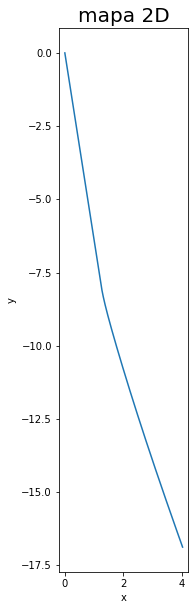

In [48]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

interest_a = 0
interest_b = 700

plt.xlabel('x')
plt.ylabel('y')
plt.title('mapa 2D', fontsize=20)
#ax = plt.gca()
#ax.set_autoscale_on(False)

plt.plot(data['x'][:][::n], data['y'][:][::n])

Text(0.5, 1.0, 'x(t)')

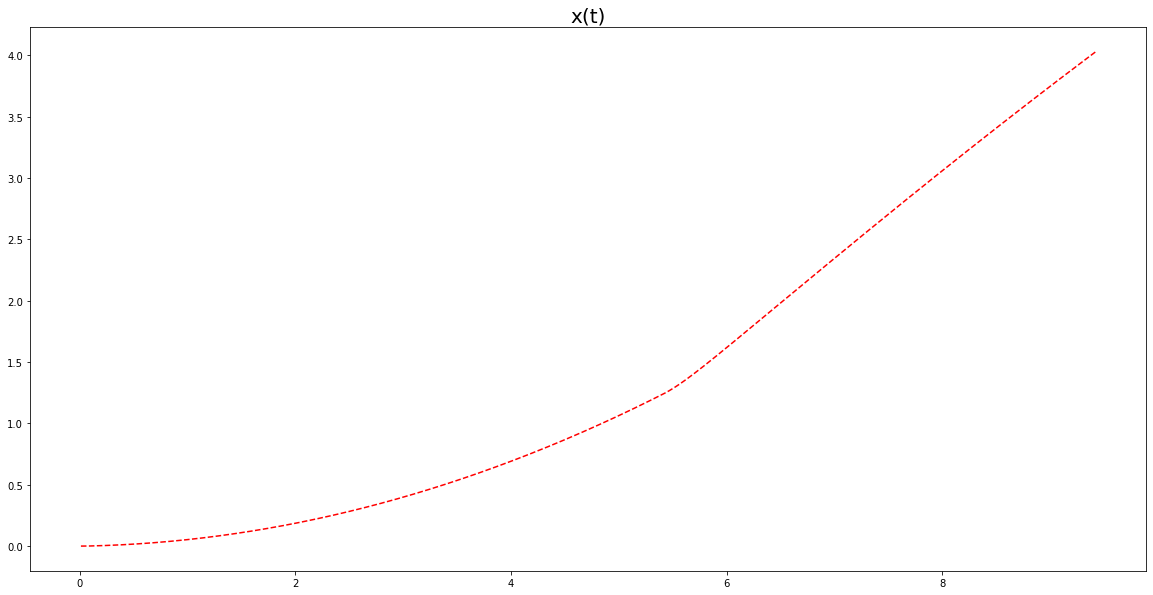

In [49]:
plt.figure(figsize=(20,10))
plt.plot(data['t'], data['x'], 'r--')
plt.title('x(t)', fontsize=20)

Text(0.5, 1.0, 'y(t)')

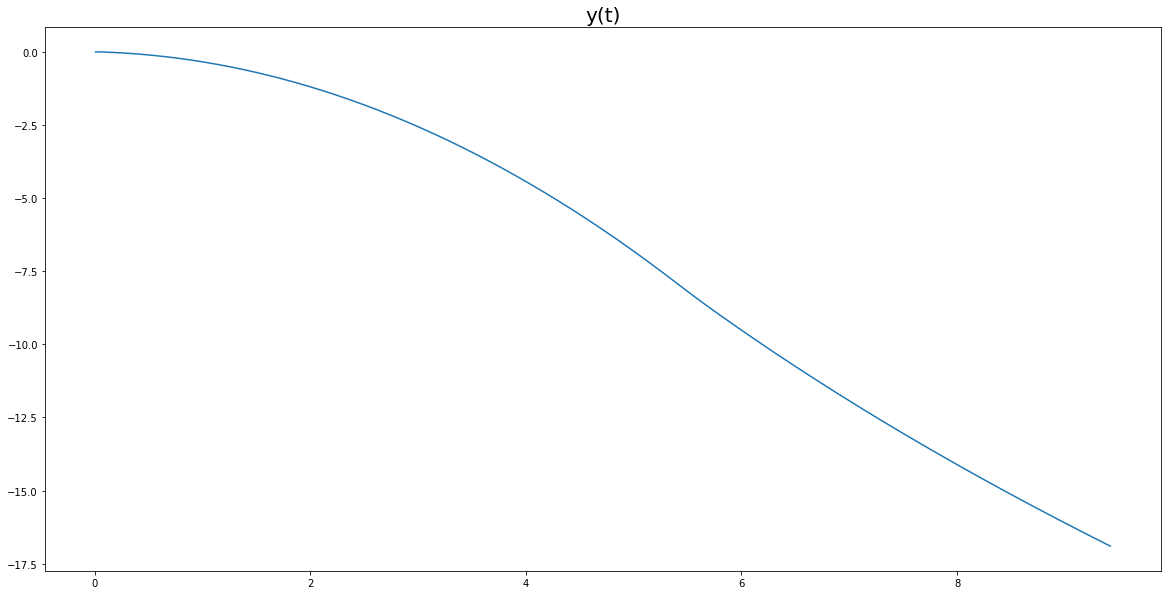

In [50]:
plt.figure(figsize=(20,10))
plt.plot(data['t'], data['y'])
plt.title('y(t)', fontsize=20)

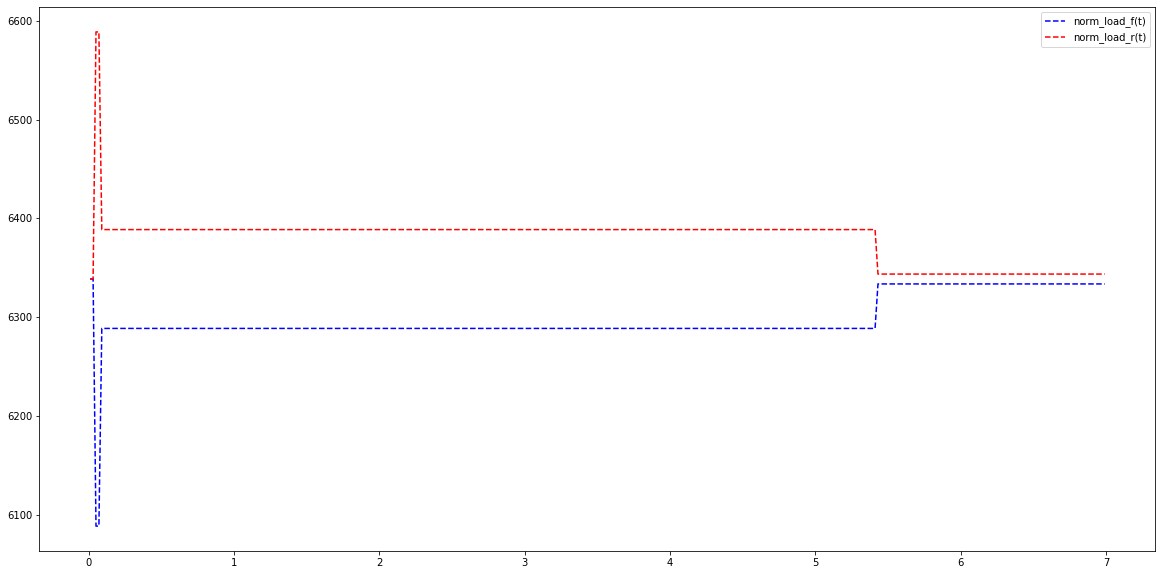

In [51]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['t'][interest_a:interest_b][::n], data['norm_load_f'][interest_a:interest_b][::n], '--b', label='norm_load_f(t)')
ax.plot(data['t'][interest_a:interest_b][::n], data['norm_load_r'][interest_a:interest_b][::n], '--r', label='norm_load_r(t)')
leg = ax.legend();

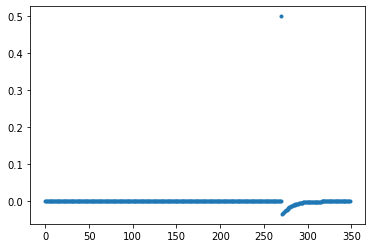

In [52]:
plt.plot(np.diff(slip_angle[interest_a:interest_b][::n]), '.')


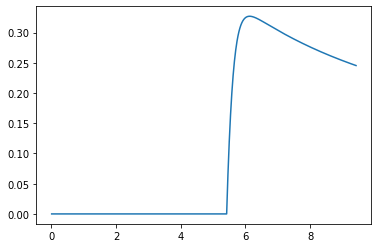

In [53]:
plt.plot(data['t'], data['yaw_rate'])

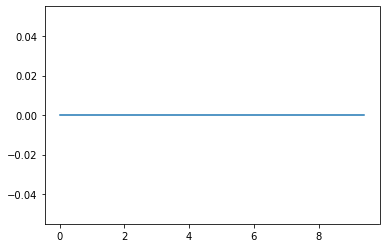

In [54]:
plt.plot(data['t'][:-1], np.diff(data['yaw_angle']))